<a href="https://colab.research.google.com/github/DennisGabriel-Dev/Estudo-de-caso-AM/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve, auc)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Carregando a base

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df = df.rename(columns={
    'Age': 'Idade',
    'Sex': 'Sexo',
    'ChestPainType': 'TipoDorPeito',
    'RestingBP': 'PressaoRepouso',
    'Cholesterol': 'Colesterol',
    'FastingBS': 'GlicemiaJejum',
    'RestingECG': 'ECGRepouso',
    'MaxHR': 'FrequenciaCardiacaMax',
    'ExerciseAngina': 'AnginaExercicio',
    'Oldpeak': 'DepressaoST',
    'ST_Slope': 'InclinacaoST',
    'HeartDisease': 'DoencaCardiaca'
})

### visualização inicial dos dados

In [ ]:
print(df.head())

   Idade Sexo TipoDorPeito  PressaoRepouso  Colesterol  GlicemiaJejum  \
0     40    M          ATA             140         289              0   
1     49    F          NAP             160         180              0   
2     37    M          ATA             130         283              0   
3     48    F          ASY             138         214              0   
4     54    M          NAP             150         195              0   

  ECGRepouso  FrequenciaCardiacaMax AnginaExercicio  DepressaoST InclinacaoST  \
0     Normal                    172               N          0.0           Up   
1     Normal                    156               N          1.0         Flat   
2         ST                     98               N          0.0           Up   
3     Normal                    108               Y          1.5         Flat   
4     Normal                    122               N          0.0           Up   

   DoencaCardiaca  
0               0  
1               1  
2             

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Idade                  918 non-null    int64  
 1   Sexo                   918 non-null    object 
 2   TipoDorPeito           918 non-null    object 
 3   PressaoRepouso         918 non-null    int64  
 4   Colesterol             918 non-null    int64  
 5   GlicemiaJejum          918 non-null    int64  
 6   ECGRepouso             918 non-null    object 
 7   FrequenciaCardiacaMax  918 non-null    int64  
 8   AnginaExercicio        918 non-null    object 
 9   DepressaoST            918 non-null    float64
 10  InclinacaoST           918 non-null    object 
 11  DoencaCardiaca         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [ ]:
print(df.describe())

            Idade  PressaoRepouso  Colesterol  GlicemiaJejum  \
count  918.000000      918.000000  918.000000     918.000000   
mean    53.510893      132.396514  198.799564       0.233115   
std      9.432617       18.514154  109.384145       0.423046   
min     28.000000        0.000000    0.000000       0.000000   
25%     47.000000      120.000000  173.250000       0.000000   
50%     54.000000      130.000000  223.000000       0.000000   
75%     60.000000      140.000000  267.000000       0.000000   
max     77.000000      200.000000  603.000000       1.000000   

       FrequenciaCardiacaMax  DepressaoST  DoencaCardiaca  
count             918.000000   918.000000      918.000000  
mean              136.809368     0.887364        0.553377  
std                25.460334     1.066570        0.497414  
min                60.000000    -2.600000        0.000000  
25%               120.000000     0.000000        0.000000  
50%               138.000000     0.600000        1.000000  
75%

In [ ]:
df.isnull().sum()

,0
Idade,0
Sexo,0
TipoDorPeito,0
PressaoRepouso,0
Colesterol,0
GlicemiaJejum,0
ECGRepouso,0
FrequenciaCardiacaMax,0
AnginaExercicio,0
DepressaoST,0


### Distribuição da variável alvo ( HeartDisease )

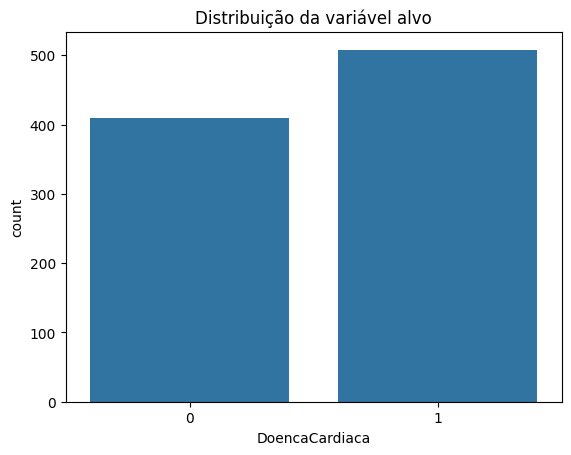

In [ ]:
sns.countplot(x='DoencaCardiaca', data=df)
plt.title('Distribuição da variável alvo')
plt.show()

### Análise exploratória dos dados

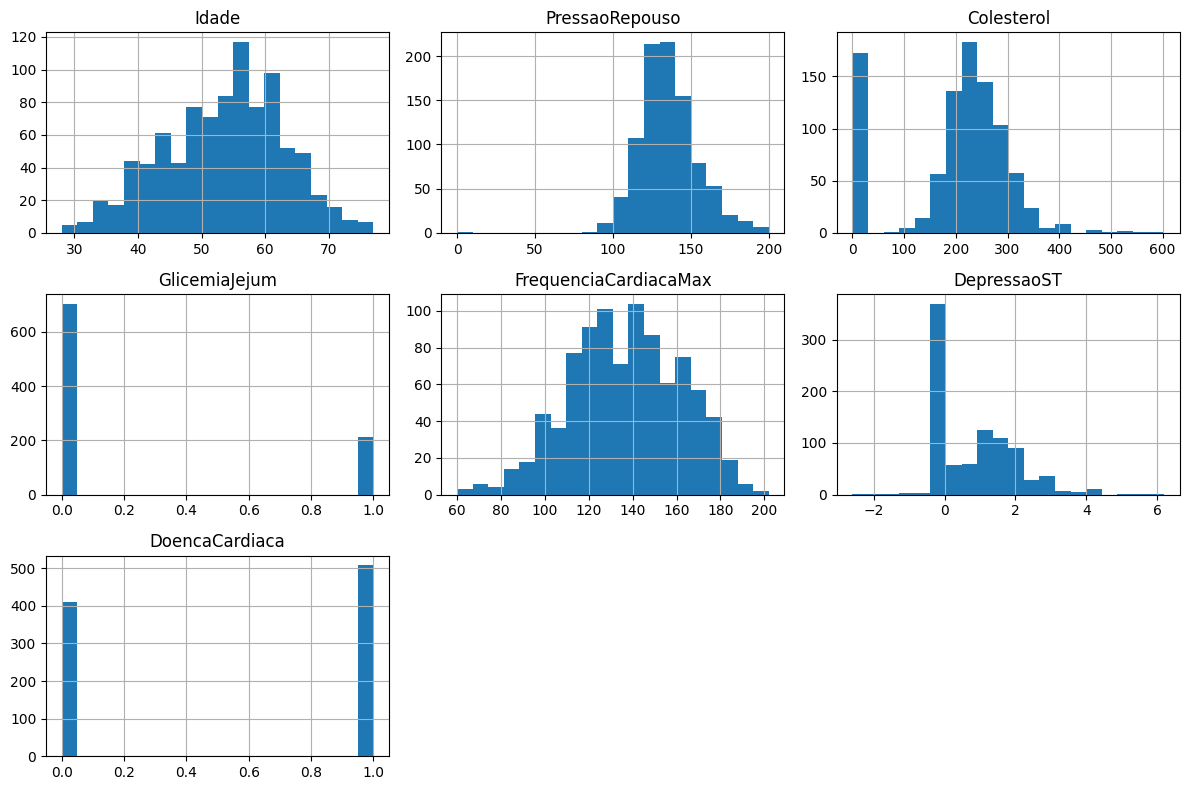

In [ ]:
df.hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

### Pré-processamento

In [ ]:
categorical_cols = ['Sexo', 'TipoDorPeito', 'ECGRepouso', 'AnginaExercicio', 'InclinacaoST']
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

### Separação de features e target

In [ ]:
X = df_encoded.drop('DoencaCardiaca', axis=1)
y = df_encoded['DoencaCardiaca']

### Padronizando os dados

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Separação de treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Inicia dicionário para calcular o tempo dos algoritmos

In [ ]:
tempos = {}

### Aplicando KNN

Escolhendo o melhor valor para k

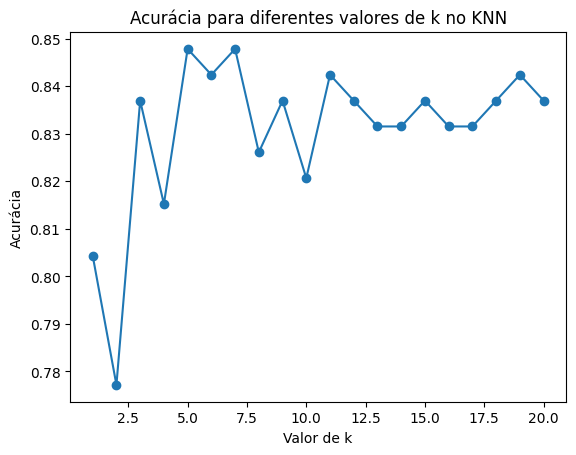

O melhor valor de k para este conjunto de dados é: 5


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# Visualizando os resultados
import matplotlib.pyplot as plt
plt.plot(k_range, scores, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.title('Acurácia para diferentes valores de k no KNN')
plt.show()

# Melhor k
melhor_k = k_range[scores.index(max(scores))]
print(f'O melhor valor de k para este conjunto de dados é: {melhor_k}')

Treinando e fazendo predição no KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
start = time.time()
knn.fit(X_train, y_train)
train_time_knn = time.time() - start

start = time.time()
y_pred_knn = knn.predict(X_test)
predict_time_knn = time.time() - start
tempos['KNN'] = {'Treinamento': train_time_knn, 'Predição': predict_time_knn}

print("KNN:\n", classification_report(y_test, y_pred_knn))

KNN:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



### Aplicando SVM

In [ ]:
svm = SVC(kernel='rbf', probability=True, random_state=42)

start = time.time()
svm.fit(X_train, y_train)
train_time_svm = time.time() - start

start = time.time()
y_pred_svm = svm.predict(X_test)
predict_time_svm = time.time() - start

tempos['SVM'] = {'Treinamento': train_time_svm, 'Predição': predict_time_svm}
print("SVM:\n", classification_report(y_test, y_pred_svm))

SVM:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



### Aplicando Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

start = time.time()
rf.fit(X_train, y_train)
train_time_rf = time.time() - start

start = time.time()
y_pred_rf = rf.predict(X_test)
predict_time_rf = time.time() - start


tempos['Random Forest'] = {'Treinamento': train_time_rf, 'Predição': predict_time_rf}
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



### Aplicando regressão logística

In [ ]:
lr = LogisticRegression(random_state=42)

start = time.time()
lr.fit(X_train, y_train)
train_time_lr = time.time() - start

start = time.time()
y_pred_lr = lr.predict(X_test)
predict_time_lr = time.time() - start

tempos['Regressão Logística'] = {'Treinamento': train_time_lr, 'Predição': predict_time_lr}
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



## Matriz de confusão

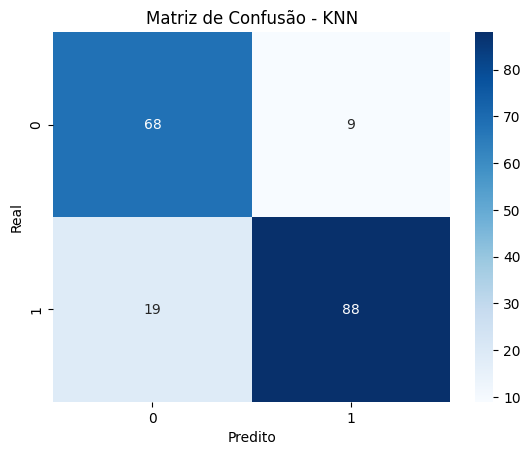

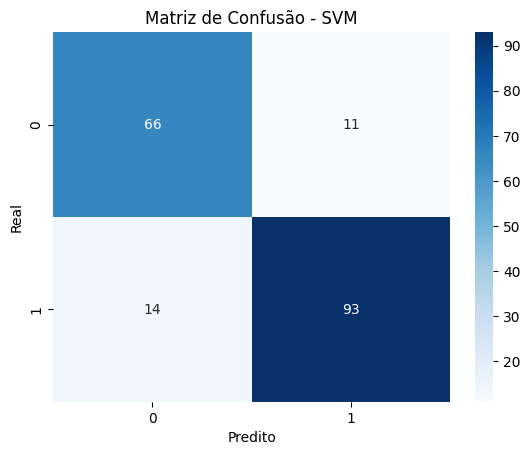

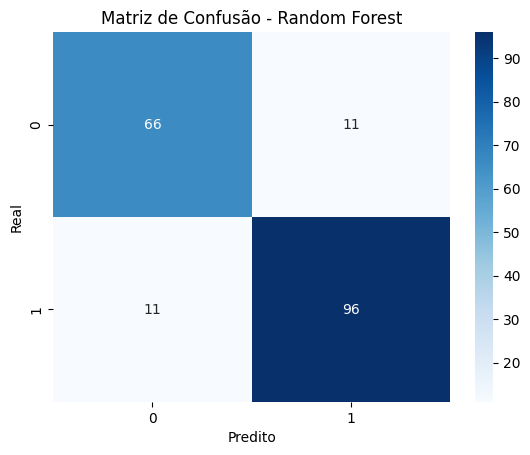

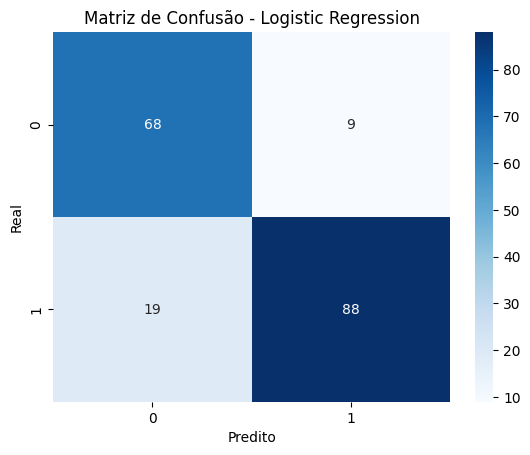

In [ ]:
model_names = ['KNN', 'SVM', 'Random Forest', 'Logistic Regression']
y_preds = [y_pred_knn, y_pred_svm, y_pred_rf, y_pred_lr]

for name, y_pred in zip(model_names, y_preds):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {name}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

### Curvas ROC e AUC

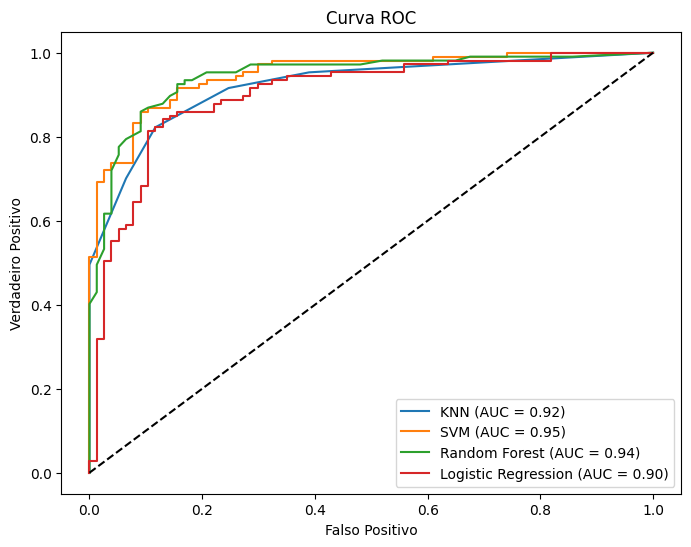

In [ ]:
plt.figure(figsize=(8,6))
for name, model, y_pred in [
    ('KNN', knn, y_pred_knn),
    ('SVM', svm, y_pred_svm),
    ('Random Forest', rf, y_pred_rf),
    ('Logistic Regression', lr, y_pred_lr)
]:
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:,1]
    else:
        y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.show()

### Comparação de métricas do algoritmos

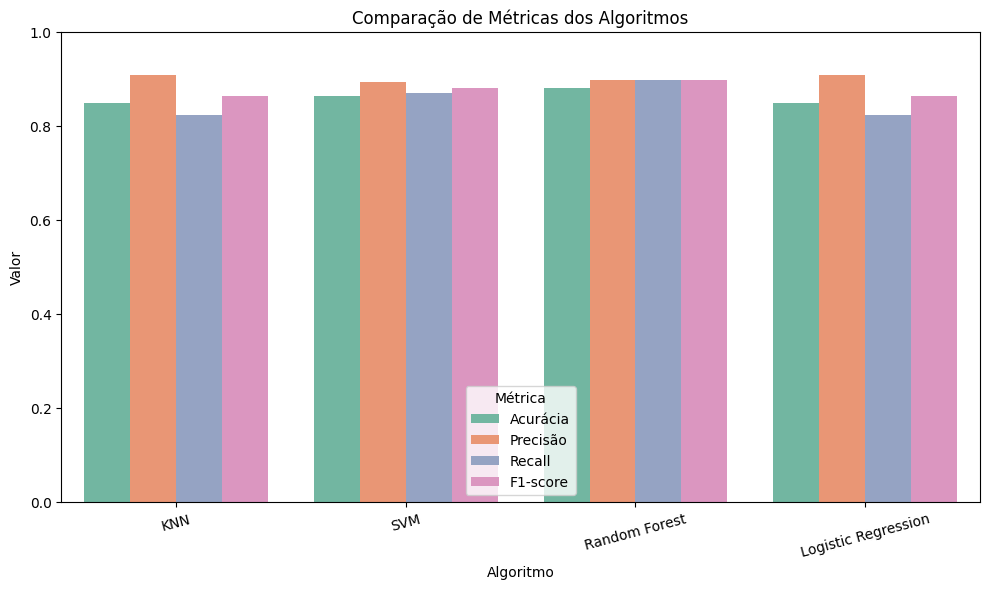

In [ ]:
results = {
    'KNN': {
        'Acurácia': accuracy_score(y_test, y_pred_knn),
        'Precisão': precision_score(y_test, y_pred_knn),
        'Recall': recall_score(y_test, y_pred_knn),
        'F1-score': f1_score(y_test, y_pred_knn)
    },
    'SVM': {
        'Acurácia': accuracy_score(y_test, y_pred_svm),
        'Precisão': precision_score(y_test, y_pred_svm),
        'Recall': recall_score(y_test, y_pred_svm),
        'F1-score': f1_score(y_test, y_pred_svm)
    },
    'Random Forest': {
        'Acurácia': accuracy_score(y_test, y_pred_rf),
        'Precisão': precision_score(y_test, y_pred_rf),
        'Recall': recall_score(y_test, y_pred_rf),
        'F1-score': f1_score(y_test, y_pred_rf)
    },
    'Logistic Regression': {
        'Acurácia': accuracy_score(y_test, y_pred_lr),
        'Precisão': precision_score(y_test, y_pred_lr),
        'Recall': recall_score(y_test, y_pred_lr),
        'F1-score': f1_score(y_test, y_pred_lr)
    }
}
df_results = pd.DataFrame(results).T
df_long = df_results.reset_index().melt(id_vars='index', var_name='Métrica', value_name='Valor')
df_long = df_long.rename(columns={'index': 'Algoritmo'})

plt.figure(figsize=(10,6))
sns.barplot(data=df_long, x='Algoritmo', y='Valor', hue='Métrica', palette='Set2')
plt.title('Comparação de Métricas dos Algoritmos')
plt.ylabel('Valor')
plt.ylim(0,1)
plt.legend(title='Métrica')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Importância do Algoritmo Random Forest

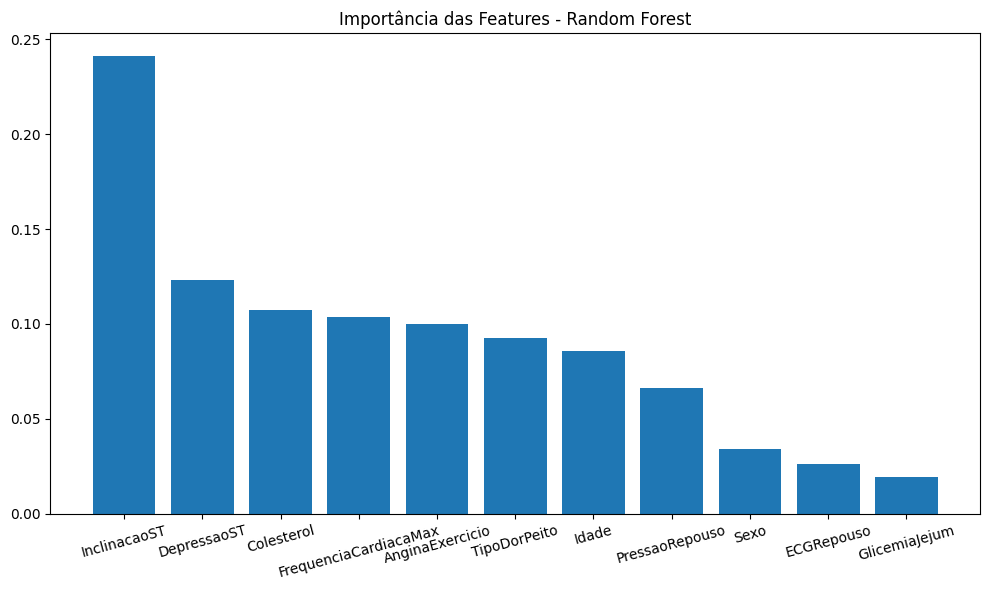

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.title("Importância das Features - Random Forest")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=15)
plt.tight_layout()
plt.show()

### Gerando gráfico de comparação entre o tempo dos algoritmos

In [ ]:
df_tempos = pd.DataFrame(tempos).T  # Transpõe para ficar mais legível
print(df_tempos)

                     Treinamento  Predição
KNN                     0.002541  0.012236
SVM                     0.109867  0.006765
Random Forest           0.195868  0.009071
Regressão Logística     0.013389  0.000532


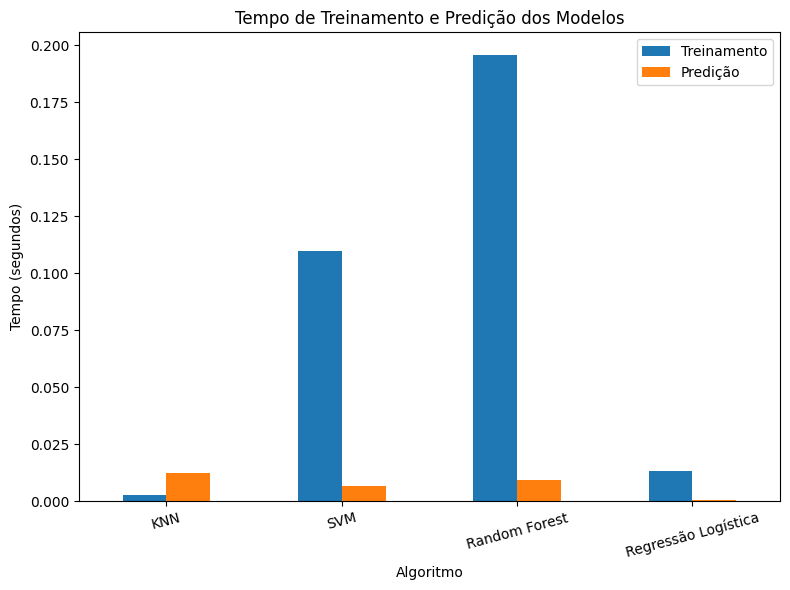

In [ ]:
import matplotlib.pyplot as plt

df_tempos.plot(kind='bar', figsize=(8,6))
plt.title('Tempo de Treinamento e Predição dos Modelos')
plt.ylabel('Tempo (segundos)')
plt.xlabel('Algoritmo')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()